<a href="https://colab.research.google.com/github/posttsoi/-building-the-first-neural-networks/blob/master/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [148]:
import torch

In [149]:
%matplotlib inline
import matplotlib.pyplot as plt 
import matplotlib

In [150]:
from functools import reduce

Train dataset



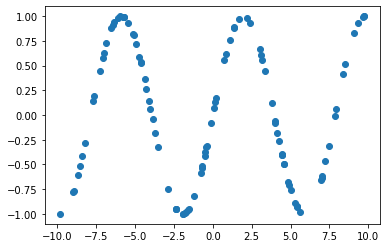

In [193]:
x_train = torch.rand(100)
x_train = x_train * 20.0 - 10.0

def func(x):
  return torch.sin(0.8*x)

y_train = func(x_train)

plt.plot(x_train.numpy(), y_train.numpy(),'o')



In [194]:
noise = torch.rand(y_train.shape) * 0.09  # сгенерируем шум



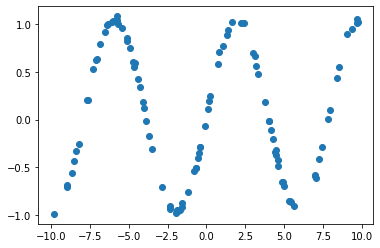

In [195]:
y_train += noise

plt.plot(x_train.numpy(), y_train.numpy(),'o')

In [196]:
x_train.unsqueeze_(1)  # получаем вектора "строки" вектор  "столбец"
y_train.unsqueeze_(1)

tensor([[-0.0143],
        [-0.5823],
        [ 1.0237],
        [ 1.0036],
        [-0.5077],
        [-0.5874],
        [ 0.1876],
        [-0.6539],
        [ 0.8195],
        [ 1.0419],
        [ 0.7661],
        [ 0.8534],
        [-0.3481],
        [-0.7071],
        [ 0.9993],
        [-0.1046],
        [-0.9315],
        [ 0.5497],
        [-0.1755],
        [-0.3082],
        [-0.9878],
        [-0.8713],
        [ 0.5253],
        [-0.4271],
        [ 0.4250],
        [ 0.6253],
        [-0.4301],
        [-0.0199],
        [ 0.1066],
        [ 0.5502],
        [ 0.7907],
        [-0.5083],
        [ 0.4807],
        [ 0.6962],
        [-0.4906],
        [-0.6986],
        [-0.0166],
        [-0.9601],
        [ 1.0243],
        [-0.9827],
        [ 0.3454],
        [ 1.0823],
        [-0.2818],
        [-0.5418],
        [ 0.9507],
        [ 0.6609],
        [-0.4080],
        [ 0.7452],
        [-0.2053],
        [ 0.6398],
        [ 0.2043],
        [-0.9066],
        [-0.

In [197]:
x_validation = torch.linspace(-10, 10, 100)
y_validation = func(x_validation)

x_validation.unsqueeze_(1)  # получаем вектора "строки" вектор  "столбец"
y_validation.unsqueeze_(1)

tensor([[-0.9894],
        [-0.9999],
        [-0.9843],
        [-0.9431],
        [-0.8774],
        [-0.7887],
        [-0.6795],
        [-0.5526],
        [-0.4113],
        [-0.2593],
        [-0.1005],
        [ 0.0609],
        [ 0.2207],
        [ 0.3748],
        [ 0.5191],
        [ 0.6499],
        [ 0.7637],
        [ 0.8576],
        [ 0.9292],
        [ 0.9766],
        [ 0.9985],
        [ 0.9944],
        [ 0.9643],
        [ 0.9091],
        [ 0.8303],
        [ 0.7298],
        [ 0.6103],
        [ 0.4748],
        [ 0.3270],
        [ 0.1707],
        [ 0.0099],
        [-0.1511],
        [-0.3082],
        [-0.4573],
        [-0.5944],
        [-0.7161],
        [-0.8191],
        [-0.9007],
        [-0.9589],
        [-0.9921],
        [-0.9994],
        [-0.9806],
        [-0.9364],
        [-0.8677],
        [-0.7764],
        [-0.6648],
        [-0.5360],
        [-0.3931],
        [-0.2401],
        [-0.0807],
        [ 0.0807],
        [ 0.2401],
        [ 0.

In [205]:
class SineNet(torch.nn.Module):
    """Модель линейной нейронной сети."""
    def __init__(self, n_hidden_neurons):
        super(SineNet, self).__init__()  # вызываем родительский инициализатор 
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons, bias= True)  # первый  полносвязный слой с одним входом (координата x)
        self.fc2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons, bias= True)  # выходной нейнон 
        self.tanh1 = torch.nn.Tanh()  #  функция активации
        self.tanh2 = torch.nn.Tanh()
        self.fc3 = torch.nn.Linear(n_hidden_neurons, 1, bias= True)
        self.nlayers = [self.fc1, self.tanh1, self.fc2, self.tanh2, self.fc3]

    def forward(self, x):
        """Фунция описывает в какой последовательности будут применяться наши слои."""
        return reduce(lambda x,f : f(x), self.nlayers , x)

In [219]:
sine_net = SineNet(50)

**Optimizer**



In [220]:
optimizer = torch.optim.Adam(sine_net.parameters(), lr=0.03)

**Loss function**


In [221]:
def loss(pred, target):
    """MSE"""
    square = (pred - target)**2
    return square.mean()

**Training procedure**


In [223]:
for epoch_index in range(2000):
    optimizer.zero_grad()

    y_pred = sine_net.forward(x_train)
    loss_val = loss(y_pred, y_train)

    loss_val.backward()
    optimizer.step()



In [216]:
def predict(net, x, y):
    """Предсказывает данные и отрисовывает их."""
    y_predict = net.forward(x)

    plt.plot(x.numpy(), y.numpy(), 'o', label='Graund truth')
    plt.plot(x_train.numpy(), y_predict.data.numpy(), 'o', c='r', label='Prediction')



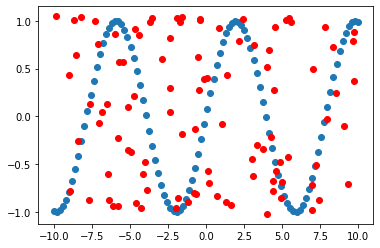

In [224]:
predict(sine_net, x_validation, y_validation)